In [3]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import img_as_float
from skimage import img_as_ubyte
import skimage.data as data
import skimage.transform as transf

(425, 640, 3)
816000


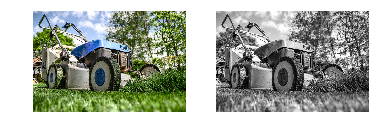

In [21]:
imagen= skimage.io.imread("yard.jpg", as_gray=False) #data.chelsea()
imgGris= skimage.io.imread("yard.jpg", as_gray=True) 
plt.subplot(121)
plt.imshow(imagen)
plt.axis('off')

plt.subplot(122)
plt.imshow(imgGris,cmap=plt.cm.gray)
plt.axis('off')

print(imagen.shape) #longitud del array
print(imagen.size) 

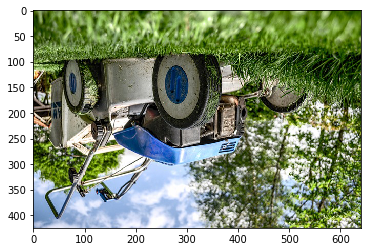

In [11]:
#invertir verticalmente
ainv=imagen[::-1] #refleja array [start:stop:step]
plt.imshow(ainv)

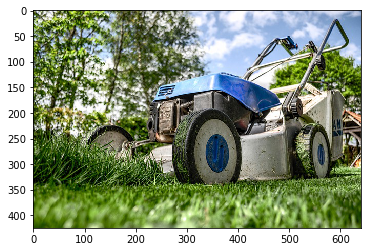

In [12]:
# invertir horizontalmente
binv=imagen[::1,::-1] #refleja array 
plt.imshow(binv)

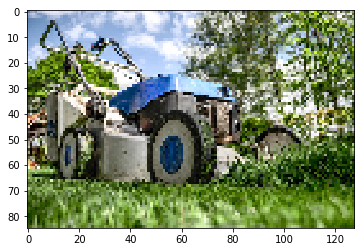

In [14]:
# Submuestrear
binv=imagen[::5,::5] #slice
plt.imshow(binv)

425 640 3
425 640 3


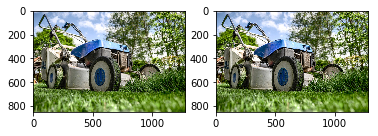

In [17]:
#remuestrear
def remuestreo(img, escala, inter):
    fil,col,ch= img.shape
    print(fil,col, ch)
    tform= transf.SimilarityTransform(scale=1/escala)
    salida=transf.warp(img,tform, order=inter, output_shape=([fil*escala,col*escala]))
    return salida;

# Próximo
plt.subplot(121)
plt.imshow(remuestreo(imagen,2,1))

# Bi-lineal
plt.subplot(122)
plt.imshow(remuestreo(imagen,2,0))

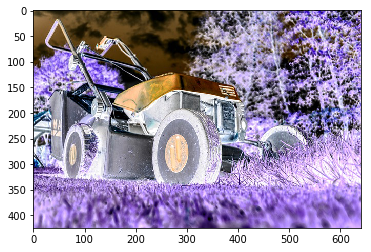

In [18]:
# Negativo
negativo=256-1- imagen[::1][::1]
plt.imshow(negativo)

c:\users\jarp\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


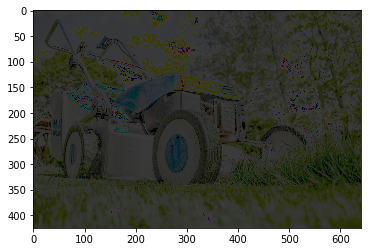

In [52]:
# Transformación logaritmica de una imagen
c=25
tlog=c*np.log10(1+imagen[::1][::1])
plt.imshow(tlog.astype(np.uint8))

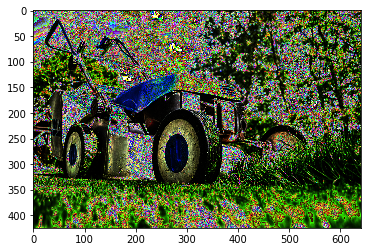

In [51]:
# Inversa logaritmica de una imagen
c=25
ilog=np.exp(imagen[::1][::1]/c)-1
plt.imshow(ilog.astype(np.uint8))

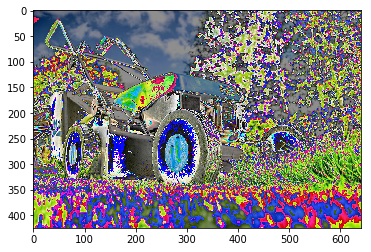

In [53]:
# Power Law
y=0.5
c=25
plog=c*imagen[::1][::1]**y
plt.imshow(plog.astype(np.uint8))

In [54]:
# Selector de bines
import ipywidgets as widgets

h=widgets.Dropdown(
    options=[256,128, 32,8],
    value=256,
    description='bines:',
    disabled=False,)
h

Dropdown(description='bines:', options=(256, 128, 32, 8), value=256)

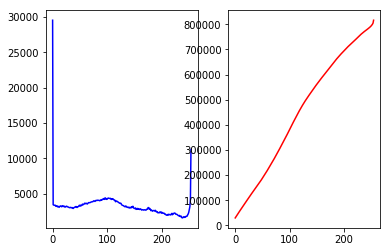

In [55]:
# graficar histograma
# hist[1] => [valores]
# hist[0] => [0,..,255]
hist, bins = np.histogram(imagen,bins=h.value) 
acumulada = np.cumsum(hist)
plt.subplot(121)
plt.plot(bins[:-1],hist,c='blue')
plt.subplot(122)
plt.plot(bins[:-1],acumulada,c='red')
plt.show()
